In [1]:
# Project 1 
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

disaster_data = "../Project1_Data/us_disaster_declarations.csv"
pollution_data = "../Project1_Data/pollution_us_2000_2016.csv"

disaster_df = pd.read_csv(disaster_data)
pollution_df = pd.read_csv(pollution_data)

disaster_df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T04:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T04:00:00Z,1953-05-02T04:00:00Z,1954-06-01T04:00:00Z,13000,0,Statewide,53013,2f28952448e0a666d367ca3f854c81ec,2020-10-05T14:21:20Z,5f7b2be031a8c6681cfb4342
1,DR-2-TX,2,TX,DR,1953-05-15T04:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T04:00:00Z,1953-05-15T04:00:00Z,1958-01-01T05:00:00Z,48000,0,Statewide,53003,c5a1a4a1030d6730d9c562cdbe7c830f,2020-10-05T14:21:20Z,5f7b2be031a8c6681cfb4345
2,DR-3-LA,3,LA,DR,1953-05-29T04:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T04:00:00Z,1953-05-29T04:00:00Z,1960-02-01T05:00:00Z,22000,0,Statewide,53005,745948932fd77a7c6dcd4de7059ff080,2020-10-05T14:21:20Z,5f7b2be031a8c6681cfb4354
3,DR-4-MI,4,MI,DR,1953-06-02T04:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T04:00:00Z,1953-06-02T04:00:00Z,1956-02-01T05:00:00Z,26000,0,Statewide,53004,8c9dee13124e36a9dfe2eb74e33fafad,2020-10-05T14:21:20Z,5f7b2be031a8c6681cfb4357
4,DR-5-MT,5,MT,DR,1953-06-06T04:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T04:00:00Z,1953-06-06T04:00:00Z,1955-12-01T05:00:00Z,30000,0,Statewide,53006,59c5483387ca13c6a3c1bc692f4860e1,2020-10-05T14:21:20Z,5f7b2be031a8c6681cfb4348


In [2]:
# drop rows of data for dates prior to the year 2000
disaster_df.drop(disaster_df[disaster_df["fy_declared"] < 2000].index, inplace=True)
disaster_df


,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
19525,EM-3150-FL,3150,FL,EM,1999-10-15T22:15:00Z,2000,Hurricane,Tropical Storm Irene - Florida,0,0,...,1999-10-14T15:00:00Z,1999-10-19T04:00:00Z,2010-04-26T04:00:00Z,12011,99011,Broward (County),99136,59a1eb8ba142005dcbf33abaaa9d1fda,2020-10-05T14:22:05Z,5f7b2c0d31a8c6681cfdcc30
19526,EM-3150-FL,3150,FL,EM,1999-10-15T22:15:00Z,2000,Hurricane,Tropical Storm Irene - Florida,0,0,...,1999-10-14T15:00:00Z,1999-10-19T04:00:00Z,2010-04-26T04:00:00Z,12027,99027,DeSoto (County),99136,b489a43931f6c46e5a04051375d758e2,2020-10-05T14:22:05Z,5f7b2c0d31a8c6681cfdcc34
19527,EM-3150-FL,3150,FL,EM,1999-10-15T22:15:00Z,2000,Hurricane,Tropical Storm Irene - Florida,0,0,...,1999-10-14T15:00:00Z,1999-10-19T04:00:00Z,2010-04-26T04:00:00Z,12009,99009,Brevard (County),99136,849ba935e1f291b13aae6fcfef7d8db1,2020-10-05T14:22:05Z,5f7b2c0d31a8c6681cfdcc37
19528,EM-3150-FL,3150,FL,EM,1999-10-15T22:15:00Z,2000,Hurricane,Tropical Storm Irene - Florida,0,0,...,1999-10-14T15:00:00Z,1999-10-19T04:00:00Z,2010-04-26T04:00:00Z,12035,99035,Flagler (County),99136,52bb06d7ffa2cd0014047885e6f3f909,2020-10-05T14:22:05Z,5f7b2c0d31a8c6681cfdcc39
19529,EM-3150-FL,3150,FL,EM,1999-10-15T22:15:00Z,2000,Hurricane,Tropical Storm Irene - Florida,0,0,...,1999-10-14T15:00:00Z,1999-10-19T04:00:00Z,2010-04-26T04:00:00Z,12021,99021,Collier (County),99136,064829aeefb981b71f4d539f5e5857cc,2020-10-05T14:22:05Z,5f7b2c0d31a8c6681cfdcc3d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60246,DR-4568-NC,4568,NC,DR,2020-10-14T14:25:00Z,2021,Hurricane,Hurricane Isaias,0,0,...,2020-08-01T01:46:00Z,2020-08-05T03:59:00Z,NaN,37137,99137,Pamlico (County),20298,0e7b0b42e89b041b7bbec62323c4a400,2020-10-14T17:42:00Z,5f8738680eb5d36238c6d474
60247,DR-4568-NC,4568,NC,DR,2020-10-14T14:25:00Z,2021,Hurricane,Hurricane Isaias,0,0,...,2020-08-01T01:46:00Z,2020-08-05T03:59:00Z,NaN,37147,99147,Pitt (County),20298,f26a5ab9fb5ada030084e08c02969f00,2020-10-14T17:42:00Z,5f8738680eb5d36238c6d47d
60248,DR-4568-NC,4568,NC,DR,2020-10-14T14:25:00Z,2021,Hurricane,Hurricane Isaias,0,0,...,2020-08-01T01:46:00Z,2020-08-05T03:59:00Z,NaN,37141,99141,Pender (County),20298,2e376c4f57759678e7d8a750227bd86f,2020-10-14T17:42:00Z,5f8738680eb5d36238c6d484
60249,DR-4568-NC,4568,NC,DR,2020-10-14T14:25:00Z,2021,Hurricane,Hurricane Isaias,0,0,...,2020-08-01T01:46:00Z,2020-08-05T03:59:00Z,NaN,37031,99031,Carteret (County),20298,7982ea0365828be377ce32684967e650,2020-10-14T17:42:00Z,5f8738680eb5d36238c6d44b


In [3]:
# drop unnecessary columns
disaster_df_clean = disaster_df.drop(['fema_declaration_string', 'ih_program_declared', 
                              'ia_program_declared', 'pa_program_declared', 
                              'hash', 'declaration_request_number', 'id',
                              'designated_area', 'hm_program_declared', 'place_code',
                              'fips', 'last_refresh', 'declaration_date', 'declaration_type', 
                                'disaster_closeout_date', 'incident_end_date', 'fy_declared', 'declaration_title'], axis=1)
disaster_df_clean.head()

,disaster_number,state,incident_type,incident_begin_date
19525,3150,FL,Hurricane,1999-10-14T15:00:00Z
19526,3150,FL,Hurricane,1999-10-14T15:00:00Z
19527,3150,FL,Hurricane,1999-10-14T15:00:00Z
19528,3150,FL,Hurricane,1999-10-14T15:00:00Z
19529,3150,FL,Hurricane,1999-10-14T15:00:00Z


In [4]:
# get just the year from the date column
disaster_df_clean['incident_begin_date'] = disaster_df_clean['incident_begin_date'].astype(str).str.slice(stop=4)

disaster_df_clean

,disaster_number,state,incident_type,incident_begin_date
19525,3150,FL,Hurricane,1999
19526,3150,FL,Hurricane,1999
19527,3150,FL,Hurricane,1999
19528,3150,FL,Hurricane,1999
19529,3150,FL,Hurricane,1999
...,...,...,...,...
60246,4568,NC,Hurricane,2020
60247,4568,NC,Hurricane,2020
60248,4568,NC,Hurricane,2020
60249,4568,NC,Hurricane,2020


In [5]:
# drop duplicate instances of natural disasters
disaster_clean = disaster_df_clean.drop_duplicates(subset='disaster_number', keep="first", inplace=False)

# use the top 5 states
states_k = ['CA', 'TX', 'OK','FL', 'CO']
disaster_clean = disaster_clean[disaster_clean['state'].isin(states_k)==True]

disaster_clean

,disaster_number,state,incident_type,incident_begin_date
19525,3150,FL,Hurricane,1999
19559,1306,FL,Hurricane,1999
19578,2286,TX,Fire,1999
19678,2287,TX,Fire,1999
19683,2289,TX,Fire,2000
...,...,...,...,...
59909,5374,CA,Fire,2020
60087,3546,FL,Hurricane,2020
60114,4564,FL,Hurricane,2020
60130,5376,CA,Fire,2020


In [6]:
# drop an unneeded column
disaster_clean = disaster_clean.drop(['disaster_number'], axis=1)
disaster_clean

,state,incident_type,incident_begin_date
19525,FL,Hurricane,1999
19559,FL,Hurricane,1999
19578,TX,Fire,1999
19678,TX,Fire,1999
19683,TX,Fire,2000
...,...,...,...
59909,CA,Fire,2020
60087,FL,Hurricane,2020
60114,FL,Hurricane,2020
60130,CA,Fire,2020


In [7]:
# focus on the top 5 types of Natural disasters
incident_keep = ['Fire', 'Severe Storm(s)', 'Hurricane','Flood', 'Severe Ice Storm']
disaster_clean = disaster_clean[disaster_clean['incident_type'].isin(incident_keep)==True]
#disaster_clean['incident_type'].value_counts()
disaster_clean = disaster_clean.iloc[4:]
disaster_clean

,state,incident_type,incident_begin_date
19683,TX,Fire,2000
19684,TX,Fire,2000
19685,TX,Fire,2000
20031,FL,Fire,2000
20111,FL,Fire,2000
...,...,...,...
59909,CA,Fire,2020
60087,FL,Hurricane,2020
60114,FL,Hurricane,2020
60130,CA,Fire,2020


In [8]:
disaster_clean = disaster_clean.rename(columns={'state': 'State', 
                                                'incident_type': 'Natural Disaster',
                                               'incident_begin_date': 'Year'})
disaster_clean = disaster_clean.reset_index(drop=True)
disaster_clean

,State,Natural Disaster,Year
0,TX,Fire,2000
1,TX,Fire,2000
2,TX,Fire,2000
3,FL,Fire,2000
4,FL,Fire,2000
...,...,...,...
716,CA,Fire,2020
717,FL,Hurricane,2020
718,FL,Hurricane,2020
719,CA,Fire,2020


In [9]:
pollution_df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [10]:
# drop unneeded columns
pollution_df_clean = pollution_df.drop(['State Code', 'County Code', 'Site Num', 'Address',
                                        'County', 'City', 'NO2 1st Max Hour', 'O3 1st Max Hour',
                                        'SO2 1st Max Hour', 'CO 1st Max Hour', 'NO2 1st Max Value',
                                        'O3 1st Max Value', 'SO2 1st Max Value', 'CO 1st Max Value',
                                        'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI'], axis=1)
pollution_df_clean = pollution_df_clean.loc[:, ~pollution_df_clean.columns.str.contains('^Unnamed')]
pollution_df_clean

,State,Date Local,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
0,Arizona,2000-01-01,Parts per billion,19.041667,Parts per million,0.022500,Parts per billion,3.000000,Parts per million,1.145833
1,Arizona,2000-01-01,Parts per billion,19.041667,Parts per million,0.022500,Parts per billion,3.000000,Parts per million,0.878947
2,Arizona,2000-01-01,Parts per billion,19.041667,Parts per million,0.022500,Parts per billion,2.975000,Parts per million,1.145833
3,Arizona,2000-01-01,Parts per billion,19.041667,Parts per million,0.022500,Parts per billion,2.975000,Parts per million,0.878947
4,Arizona,2000-01-02,Parts per billion,22.958333,Parts per million,0.013375,Parts per billion,1.958333,Parts per million,0.850000
...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,2016-03-30,Parts per billion,1.083333,Parts per million,0.043917,Parts per billion,0.000000,Parts per million,0.091667
1746657,Wyoming,2016-03-31,Parts per billion,0.939130,Parts per million,0.045263,Parts per billion,-0.022727,Parts per million,0.067714
1746658,Wyoming,2016-03-31,Parts per billion,0.939130,Parts per million,0.045263,Parts per billion,-0.022727,Parts per million,0.100000
1746659,Wyoming,2016-03-31,Parts per billion,0.939130,Parts per million,0.045263,Parts per billion,0.000000,Parts per million,0.067714


In [11]:
pollution_df_clean['Date Local'] = pd.to_numeric(pollution_df_clean['Date Local'].str.replace('-',''))
#pollution_by_state = pollution_df_clean.groupby(['State'])['NO2 Mean'].mean()
pollution_df_clean

,State,Date Local,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
0,Arizona,20000101,Parts per billion,19.041667,Parts per million,0.022500,Parts per billion,3.000000,Parts per million,1.145833
1,Arizona,20000101,Parts per billion,19.041667,Parts per million,0.022500,Parts per billion,3.000000,Parts per million,0.878947
2,Arizona,20000101,Parts per billion,19.041667,Parts per million,0.022500,Parts per billion,2.975000,Parts per million,1.145833
3,Arizona,20000101,Parts per billion,19.041667,Parts per million,0.022500,Parts per billion,2.975000,Parts per million,0.878947
4,Arizona,20000102,Parts per billion,22.958333,Parts per million,0.013375,Parts per billion,1.958333,Parts per million,0.850000
...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,20160330,Parts per billion,1.083333,Parts per million,0.043917,Parts per billion,0.000000,Parts per million,0.091667
1746657,Wyoming,20160331,Parts per billion,0.939130,Parts per million,0.045263,Parts per billion,-0.022727,Parts per million,0.067714
1746658,Wyoming,20160331,Parts per billion,0.939130,Parts per million,0.045263,Parts per billion,-0.022727,Parts per million,0.100000
1746659,Wyoming,20160331,Parts per billion,0.939130,Parts per million,0.045263,Parts per billion,0.000000,Parts per million,0.067714


In [12]:
pollution_df_clean.set_index('State')
#pollution_df_clean.drop(pollution_df_clean['State'] == 'Wyoming')
st = pollution_df_clean.loc[:, 'State']
#st
pollution_df_clean.drop(pollution_df_clean[pollution_df_clean['State'] == 'Wyoming'].index, inplace = True)
#pollution_df_clean

#state_drop = ['Ohio', 'Massachusetts', 'Hawaii', 'Missouri', 'Washington', 'Kentucky', 'Indiana', 'Wyoming', 'Oregon', 'North Dakota', 'Nevada', 'Country Of Mexico', 'New Hampshire', 'Utah', 'South Dakota', 'Michigan', 'Georgia', 'New Mexico', 'South Carolina', 'Rhode Island', 'Tennessee', 'Delaware', 'Minnesota', 'Alabama', 'Alaska', 'Idaho', 'Wisconsin']
state_keep = ['California', 'Texas', 'Oklahoma', 'Florida', 'Colorado']
newdf = pollution_df_clean[pollution_df_clean['State'].isin(state_keep)==True]
pol_df_clean = newdf
pol_df_clean = pol_df_clean.rename(columns={'Date Local': 'Date'})
pol_df_clean = pol_df_clean.reset_index(drop=True)
pol_df_clean

,State,Date,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
0,California,20000101,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.636364,Parts per million,0.556522
1,California,20000101,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.636364,Parts per million,0.572222
2,California,20000101,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.600000,Parts per million,0.556522
3,California,20000101,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.600000,Parts per million,0.572222
4,California,20000102,Parts per billion,16.043478,Parts per million,0.015292,Parts per billion,1.000000,Parts per million,0.578261
...,...,...,...,...,...,...,...,...,...,...
794871,Texas,20160429,Parts per billion,1.325000,Parts per million,0.027125,Parts per billion,0.542857,Parts per million,0.200000
794872,Texas,20160430,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.188235,Parts per million,0.129167
794873,Texas,20160430,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.188235,Parts per million,0.133333
794874,Texas,20160430,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.166667,Parts per million,0.129167


In [13]:
states = pol_df_clean['State'].unique()
states

array(['California', 'Colorado', 'Florida', 'Oklahoma', 'Texas'],
      dtype=object)

In [14]:
NO2 = pol_df_clean.iloc[:, 0:5]
NO2

,State,Date,NO2 Units,NO2 Mean,O3 Units
0,California,20000101,Parts per billion,14.782609,Parts per million
1,California,20000101,Parts per billion,14.782609,Parts per million
2,California,20000101,Parts per billion,14.782609,Parts per million
3,California,20000101,Parts per billion,14.782609,Parts per million
4,California,20000102,Parts per billion,16.043478,Parts per million
...,...,...,...,...,...
794871,Texas,20160429,Parts per billion,1.325000,Parts per million
794872,Texas,20160430,Parts per billion,2.670833,Parts per million
794873,Texas,20160430,Parts per billion,2.670833,Parts per million
794874,Texas,20160430,Parts per billion,2.670833,Parts per million


In [15]:
O3 = pol_df_clean.loc[:, ["State", "Date", "O3 Units", "O3 Mean"]]
O3

,State,Date,O3 Units,O3 Mean
0,California,20000101,Parts per million,0.015542
1,California,20000101,Parts per million,0.015542
2,California,20000101,Parts per million,0.015542
3,California,20000101,Parts per million,0.015542
4,California,20000102,Parts per million,0.015292
...,...,...,...,...
794871,Texas,20160429,Parts per million,0.027125
794872,Texas,20160430,Parts per million,0.030889
794873,Texas,20160430,Parts per million,0.030889
794874,Texas,20160430,Parts per million,0.030889


In [16]:
SO2 = pol_df_clean.loc[:, ["State", "Date", "SO2 Units", "SO2 Mean"]]
SO2

,State,Date,SO2 Units,SO2 Mean
0,California,20000101,Parts per billion,0.636364
1,California,20000101,Parts per billion,0.636364
2,California,20000101,Parts per billion,0.600000
3,California,20000101,Parts per billion,0.600000
4,California,20000102,Parts per billion,1.000000
...,...,...,...,...
794871,Texas,20160429,Parts per billion,0.542857
794872,Texas,20160430,Parts per billion,-0.188235
794873,Texas,20160430,Parts per billion,-0.188235
794874,Texas,20160430,Parts per billion,-0.166667


In [17]:
CO = pol_df_clean.loc[:, ["State", "Date", "CO Units", "CO Mean"]]
CO

,State,Date,CO Units,CO Mean
0,California,20000101,Parts per million,0.556522
1,California,20000101,Parts per million,0.572222
2,California,20000101,Parts per million,0.556522
3,California,20000101,Parts per million,0.572222
4,California,20000102,Parts per million,0.578261
...,...,...,...,...
794871,Texas,20160429,Parts per million,0.200000
794872,Texas,20160430,Parts per million,0.129167
794873,Texas,20160430,Parts per million,0.133333
794874,Texas,20160430,Parts per million,0.129167


In [18]:
year_2000 = CO.loc[CO['Date'] < 20010000, :]
year_2000

,State,Date,CO Units,CO Mean
0,California,20000101,Parts per million,0.556522
1,California,20000101,Parts per million,0.572222
2,California,20000101,Parts per million,0.556522
3,California,20000101,Parts per million,0.572222
4,California,20000102,Parts per million,0.578261
...,...,...,...,...
42769,Texas,20001230,Parts per million,0.441667
42770,Texas,20001231,Parts per million,0.422727
42771,Texas,20001231,Parts per million,0.575000
42772,Texas,20001231,Parts per million,0.422727


In [19]:
yr2000_state_CO = year_2000.groupby('State')['CO Mean'].mean()
yr2000_state_CO

State
California    0.644488
Colorado      0.611388
Florida       0.725072
Oklahoma      0.047977
Texas         0.436668
Name: CO Mean, dtype: float64

In [20]:


#test = yr2000.groupby('State')['NO2 Mean'].mean()
#test

In [21]:
#ca_co_2000 = round(cali2000['CO Mean'].mean(), 2)


#gas_list = ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']
#ca_co_2000

In [22]:
#ca = pol_df_clean[(pol_df_clean['State'] == 'California')]
#ca



In [23]:
# clean date to just get the year
pol_df_clean['Date'] = pol_df_clean['Date'].astype(str).str.slice(stop=4)
pol_df_clean


,State,Date,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
0,California,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.636364,Parts per million,0.556522
1,California,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.636364,Parts per million,0.572222
2,California,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.600000,Parts per million,0.556522
3,California,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.600000,Parts per million,0.572222
4,California,2000,Parts per billion,16.043478,Parts per million,0.015292,Parts per billion,1.000000,Parts per million,0.578261
...,...,...,...,...,...,...,...,...,...,...
794871,Texas,2016,Parts per billion,1.325000,Parts per million,0.027125,Parts per billion,0.542857,Parts per million,0.200000
794872,Texas,2016,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.188235,Parts per million,0.129167
794873,Texas,2016,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.188235,Parts per million,0.133333
794874,Texas,2016,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.166667,Parts per million,0.129167


In [24]:
no2mean = pol_df_clean.groupby(by=['State','Date'])['NO2 Mean'].mean()
no2mean

State       Date
California  2000    17.580989
            2001    17.760822
            2002    16.755128
            2003    15.794642
            2004    15.151141
                      ...    
Texas       2012    10.316445
            2013     9.571833
            2014     9.534497
            2015     9.252533
            2016    10.357079
Name: NO2 Mean, Length: 85, dtype: float64

In [25]:
o3mean = pol_df_clean.groupby(by=['State','Date'])['O3 Mean'].mean()
#o3mean
so2mean = pol_df_clean.groupby(by=['State','Date'])['SO2 Mean'].mean()
comean = pol_df_clean.groupby(by=['State','Date'])['CO Mean'].mean()       

In [26]:
comean

State       Date
California  2000    0.644488
            2001    0.622149
            2002    0.601791
            2003    0.575379
            2004    0.517947
                      ...   
Texas       2012    0.182515
            2013    0.175513
            2014    0.178338
            2015    0.207629
            2016    0.227267
Name: CO Mean, Length: 85, dtype: float64

In [27]:
#yr2000 = pol_df_clean[(pol_df_clean['Date'] < 20010000)]
#yr2001 = pol_df_clean[(pol_df_clean['Date'] < 20020000) & (pol_df_clean['Date'] > 20010000)]
#yr2002 = pol_df_clean[(pol_df_clean['Date'] < 20030000) & (pol_df_clean['Date'] > 20020000)]
#yr2003 = pol_df_clean[(pol_df_clean['Date'] < 20040000) & (pol_df_clean['Date'] > 20030000)]
#yr2004 = pol_df_clean[(pol_df_clean['Date'] < 20050000) & (pol_df_clean['Date'] > 20040000)]
#yr2005 = pol_df_clean[(pol_df_clean['Date'] < 20060000) & (pol_df_clean['Date'] > 20050000)]
#yr2006 = pol_df_clean[(pol_df_clean['Date'] < 20070000) & (pol_df_clean['Date'] > 20060000)]
#yr2007 = pol_df_clean[(pol_df_clean['Date'] < 20080000) & (pol_df_clean['Date'] > 20070000)]
#yr2008 = pol_df_clean[(pol_df_clean['Date'] < 20090000) & (pol_df_clean['Date'] > 20080000)]
#yr2009 = pol_df_clean[(pol_df_clean['Date'] < 20100000) & (pol_df_clean['Date'] > 20090000)]
#yr2010 = pol_df_clean[(pol_df_clean['Date Local'] < 20110000) & (pol_df_clean['Date Local'] > 20100000)]
#yr2011 = pol_df_clean[(pol_df_clean['Date Local'] < 20120000) & (pol_df_clean['Date Local'] > 20110000)]
#yr2012 = pol_df_clean[(pol_df_clean['Date Local'] < 20130000) & (pol_df_clean['Date Local'] > 20120000)]
#yr2013 = pol_df_clean[(pol_df_clean['Date Local'] < 20140000) & (pol_df_clean['Date Local'] > 20130000)]
#yr2014 = pol_df_clean[(pol_df_clean['Date Local'] < 20150000) & (pol_df_clean['Date Local'] > 20140000)]
#yr2015 = pol_df_clean[(pol_df_clean['Date Local'] < 20160000) & (pol_df_clean['Date Local'] > 20150000)]
#yr2016 = pol_df_clean[(pol_df_clean['Date Local'] < 20170000) & (pol_df_clean['Date Local'] > 20160000)]


#cali2000 = yr2000[(yr2000['State'] == 'California')]
#yr_2016_CO = yr2016.groupby('State')['CO Mean'].mean()
#yr_2016_NO2 = yr2016.groupby('State')['NO2 Mean'].mean()
#yr_2016_O3 = yr2016.groupby('State')['O3 Mean'].mean()
#yr_2016_SO2 = yr2016.groupby('State')['SO2 Mean'].mean()
#cali2000
pol_df_clean


,State,Date,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
0,California,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.636364,Parts per million,0.556522
1,California,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.636364,Parts per million,0.572222
2,California,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.600000,Parts per million,0.556522
3,California,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.600000,Parts per million,0.572222
4,California,2000,Parts per billion,16.043478,Parts per million,0.015292,Parts per billion,1.000000,Parts per million,0.578261
...,...,...,...,...,...,...,...,...,...,...
794871,Texas,2016,Parts per billion,1.325000,Parts per million,0.027125,Parts per billion,0.542857,Parts per million,0.200000
794872,Texas,2016,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.188235,Parts per million,0.129167
794873,Texas,2016,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.188235,Parts per million,0.133333
794874,Texas,2016,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.166667,Parts per million,0.129167


In [28]:
pol_df_clean.State = pol_df_clean.State.replace('California', 'CA')
pol_df_clean.State = pol_df_clean.State.replace('Texas', 'TX')
pol_df_clean.State = pol_df_clean.State.replace('Florida', 'FL')
pol_df_clean.State = pol_df_clean.State.replace('Oklahoma', 'OK')
pol_df_clean.State = pol_df_clean.State.replace('Colorado', 'CO')
pol_df_clean

,State,Date,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
0,CA,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.636364,Parts per million,0.556522
1,CA,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.636364,Parts per million,0.572222
2,CA,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.600000,Parts per million,0.556522
3,CA,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.600000,Parts per million,0.572222
4,CA,2000,Parts per billion,16.043478,Parts per million,0.015292,Parts per billion,1.000000,Parts per million,0.578261
...,...,...,...,...,...,...,...,...,...,...
794871,TX,2016,Parts per billion,1.325000,Parts per million,0.027125,Parts per billion,0.542857,Parts per million,0.200000
794872,TX,2016,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.188235,Parts per million,0.129167
794873,TX,2016,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.188235,Parts per million,0.133333
794874,TX,2016,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.166667,Parts per million,0.129167


In [29]:
#pol_df_clean.to_csv('Data_clean\pollution.csv')
#disaster_clean.to_csv('Data_clean\disaster.csv')

In [30]:
disaster_clean

,State,Natural Disaster,Year
0,TX,Fire,2000
1,TX,Fire,2000
2,TX,Fire,2000
3,FL,Fire,2000
4,FL,Fire,2000
...,...,...,...
716,CA,Fire,2020
717,FL,Hurricane,2020
718,FL,Hurricane,2020
719,CA,Fire,2020


In [31]:
disaster_clean['Natural Disaster'].value_counts()

Fire                575
Severe Storm(s)      74
Hurricane            44
Flood                18
Severe Ice Storm     10
Name: Natural Disaster, dtype: int64

In [32]:
ca_disaster = disaster_clean[(disaster_clean['State'] == 'CA')]
tx_disaster = disaster_clean[(disaster_clean['State'] == 'TX')]
fl_disaster = disaster_clean[(disaster_clean['State'] == 'FL')]
ok_disaster = disaster_clean[(disaster_clean['State'] == 'OK')]
co_disaster = disaster_clean[(disaster_clean['State'] == 'CO')]

ca_disaster['Natural Disaster'].value_counts()

Fire               238
Severe Storm(s)     13
Flood                4
Hurricane            1
Name: Natural Disaster, dtype: int64

In [33]:
co_disaster

,State,Natural Disaster,Year
13,CO,Fire,2000
14,CO,Fire,2000
27,CO,Fire,2000
49,CO,Severe Storm(s),2001
54,CO,Fire,2001
...,...,...,...
643,CO,Fire,2018
644,CO,Fire,2018
703,CO,Fire,2020
704,CO,Fire,2020


In [34]:
fl_disaster

,State,Natural Disaster,Year
3,FL,Fire,2000
4,FL,Fire,2000
5,FL,Fire,2000
6,FL,Fire,2000
7,FL,Fire,2000
...,...,...,...
694,FL,Fire,2020
695,FL,Fire,2020
697,FL,Hurricane,2020
717,FL,Hurricane,2020


In [35]:
ok_disaster

,State,Natural Disaster,Year
29,OK,Fire,2000
30,OK,Fire,2000
31,OK,Fire,2000
35,OK,Severe Storm(s),2000
36,OK,Severe Ice Storm,2000
...,...,...,...
672,OK,Severe Storm(s),2019
674,OK,Severe Storm(s),2019
690,OK,Fire,2019
691,OK,Fire,2019


In [36]:
tx_disaster

,State,Natural Disaster,Year
0,TX,Fire,2000
1,TX,Fire,2000
2,TX,Fire,2000
15,TX,Fire,2000
16,TX,Fire,2000
...,...,...,...
673,TX,Flood,2019
675,TX,Fire,2019
678,TX,Flood,2019
696,TX,Hurricane,2020


In [37]:
tx_disaster['Natural Disaster'].value_counts()

Fire                147
Hurricane            14
Severe Storm(s)       9
Flood                 8
Severe Ice Storm      1
Name: Natural Disaster, dtype: int64

In [38]:
fl_disaster['Year'].value_counts()

2000    12
2001    10
2017     8
2007     7
2020     6
2005     5
2008     5
2004     4
2016     3
2009     3
2019     3
2006     2
2012     2
2003     2
2018     2
2014     1
2011     1
2013     1
Name: Year, dtype: int64

In [91]:
ca = pol_df_clean[(pol_df_clean['State'] == 'CA')]
tx = pol_df_clean[(pol_df_clean['State'] == 'TX')]
fl = pol_df_clean[(pol_df_clean['State'] == 'FL')]
co = pol_df_clean[(pol_df_clean['State'] == 'CO')]
ok = pol_df_clean[(pol_df_clean['State'] == 'OK')]
ca.describe()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
count,576142.000000,576142.000000,576142.000000,576142.000000
mean,13.651894,0.026053,1.146695,0.447485
std,11.081922,0.011530,1.406326,0.375866
min,-1.871429,0.000000,-1.521739,-0.400000
25%,5.181818,0.017750,0.157143,0.220833
50%,10.943961,0.026000,0.760000,0.343478
75%,19.545455,0.034000,1.556522,0.552174
max,98.130435,0.086214,40.271429,7.508333


In [92]:
co.describe()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
count,35188.000000,35188.000000,35188.000000,35188.000000
mean,19.634275,0.023551,1.507634,0.443112
std,11.541242,0.011626,1.584635,0.255458
min,-0.095238,0.000000,-1.000000,-0.195833
25%,11.665217,0.014333,0.333333,0.279167
50%,18.913043,0.023792,1.100000,0.383333
75%,26.890580,0.032792,2.128571,0.541667
max,92.000000,0.061875,21.066667,2.475000


In [93]:
fl.describe()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
count,25918.000000,25918.000000,25918.000000,25918.000000
mean,7.363386,0.026799,0.495490,0.425255
std,4.895178,0.009737,1.005301,0.233215
min,0.000000,0.001750,-1.000000,-0.305000
25%,3.833333,0.019708,0.000000,0.258333
50%,6.208333,0.025583,0.083333,0.400000
75%,9.583333,0.033125,0.575000,0.552174
max,42.300000,0.062958,13.791667,1.991667


In [94]:
ok.describe()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
count,34420.000000,34420.000000,34420.000000,34420.000000
mean,6.763139,0.031372,0.721274,0.140372
std,3.829217,0.011204,3.643211,0.133254
min,-2.000000,0.000000,-1.000000,-0.179167
25%,4.041667,0.023458,0.083333,0.020833
50%,6.041667,0.030875,0.375000,0.120833
75%,8.631818,0.038542,0.916667,0.204167
max,29.916667,0.074375,321.625000,1.329167


In [95]:
tx.describe()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
count,123208.000000,123208.000000,123208.000000,123208.000000
mean,11.592394,0.025767,0.987712,0.247957
std,7.821107,0.011025,1.995409,0.191657
min,-1.761111,0.000000,-1.728571,-0.100000
25%,5.523539,0.017417,0.037500,0.125000
50%,10.291667,0.024708,0.325000,0.204167
75%,16.191099,0.033500,0.962500,0.312500
max,53.681818,0.076500,38.128571,4.246667


In [89]:
pol_df_clean.describe()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
count,794876.000000,794876.000000,794876.000000,794876.000000
mean,13.094152,0.026153,1.098376,0.402340
std,10.539614,0.011455,1.672883,0.348938
min,-2.000000,0.000000,-1.728571,-0.400000
25%,5.133333,0.017875,0.116667,0.200000
50%,10.434783,0.025958,0.625000,0.312500
75%,18.565217,0.034042,1.433333,0.500000
max,98.130435,0.086214,321.625000,7.508333


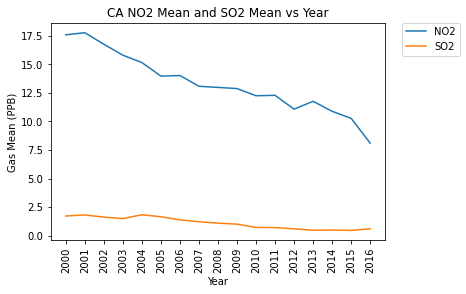

In [40]:
no2mean = ca.groupby(by=['Date'])['NO2 Mean'].mean().values
NO2x = ca.groupby(by=['Date'])['NO2 Mean'].mean().index
NO2y = no2mean

so2mean = ca.groupby(by=['Date'])['SO2 Mean'].mean().values
SO2x = ca.groupby(by=['Date'])['SO2 Mean'].mean().index
SO2y = so2mean

plt.plot(NO2x, NO2y, label="NO2")
plt.plot(SO2x, SO2y, label="SO2")
plt.xticks(rotation='vertical')
plt.title("CA NO2 Mean and SO2 Mean vs Year")
plt.xlabel("Year")
plt.ylabel("Gas Mean (PPB)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



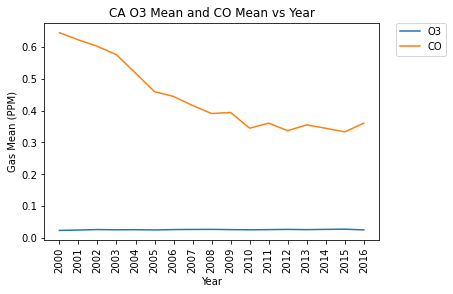

In [41]:
O3mean = ca.groupby(by=['Date'])['O3 Mean'].mean().values
O3x = ca.groupby(by=['Date'])['O3 Mean'].mean().index
O3y = O3mean
COmean = ca.groupby(by=['Date'])['CO Mean'].mean().values
COx = ca.groupby(by=['Date'])['CO Mean'].mean().index
COy = COmean
plt.plot(O3x, O3y, label="O3")
plt.plot(COx, COy, label="CO")
plt.xticks(rotation='vertical')
plt.title("CA O3 Mean and CO Mean vs Year")
plt.xlabel("Year")
plt.ylabel("Gas Mean (PPM)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


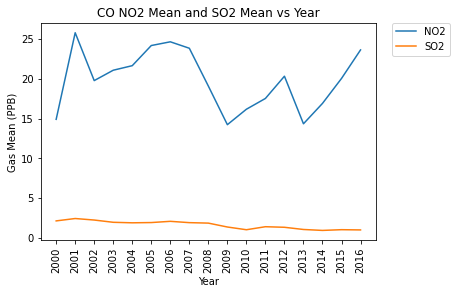

In [42]:
co = pol_df_clean[(pol_df_clean['State'] == 'CO')]
no2mean = co.groupby(by=['Date'])['NO2 Mean'].mean().values
NO2x = co.groupby(by=['Date'])['NO2 Mean'].mean().index
NO2y = no2mean
so2mean = co.groupby(by=['Date'])['SO2 Mean'].mean().values
SO2x = co.groupby(by=['Date'])['SO2 Mean'].mean().index
SO2y = so2mean
plt.plot(NO2x, NO2y, label="NO2")
plt.plot(SO2x, SO2y, label="SO2")
plt.xticks(rotation='vertical')
plt.title("CO NO2 Mean and SO2 Mean vs Year")
plt.xlabel("Year")
plt.ylabel("Gas Mean (PPB)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

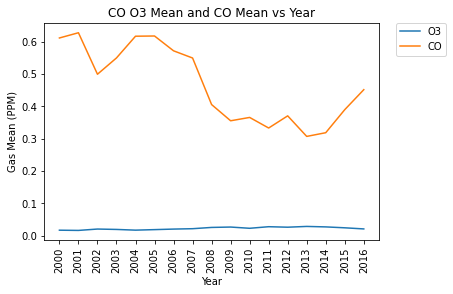

In [43]:
O3mean = co.groupby(by=['Date'])['O3 Mean'].mean().values
O3x = co.groupby(by=['Date'])['O3 Mean'].mean().index
O3y = O3mean
COmean = co.groupby(by=['Date'])['CO Mean'].mean().values
COx = co.groupby(by=['Date'])['CO Mean'].mean().index
COy = COmean
plt.plot(O3x, O3y, label="O3")
plt.plot(COx, COy, label="CO")
plt.xticks(rotation='vertical')
plt.title("CO O3 Mean and CO Mean vs Year")
plt.xlabel("Year")
plt.ylabel("Gas Mean (PPM)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

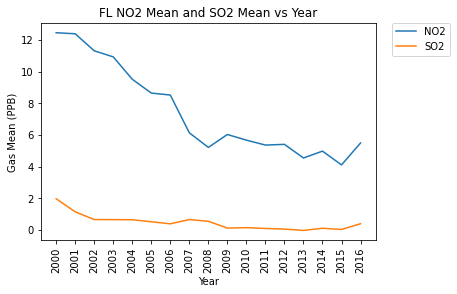

In [44]:
fl = pol_df_clean[(pol_df_clean['State'] == 'FL')]
no2mean = fl.groupby(by=['Date'])['NO2 Mean'].mean().values
NO2x = fl.groupby(by=['Date'])['NO2 Mean'].mean().index
NO2y = no2mean
so2mean = fl.groupby(by=['Date'])['SO2 Mean'].mean().values
SO2x = fl.groupby(by=['Date'])['SO2 Mean'].mean().index
SO2y = so2mean
plt.plot(NO2x, NO2y, label="NO2")
plt.plot(SO2x, SO2y, label="SO2")
plt.xticks(rotation='vertical')
plt.title("FL NO2 Mean and SO2 Mean vs Year")
plt.xlabel("Year")
plt.ylabel("Gas Mean (PPB)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

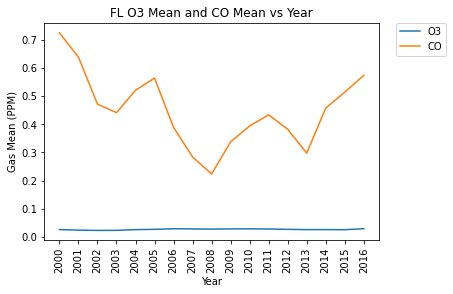

In [45]:
O3mean = fl.groupby(by=['Date'])['O3 Mean'].mean().values
O3x = fl.groupby(by=['Date'])['O3 Mean'].mean().index
O3y = O3mean
COmean = fl.groupby(by=['Date'])['CO Mean'].mean().values
COx = fl.groupby(by=['Date'])['CO Mean'].mean().index
COy = COmean
plt.plot(O3x, O3y, label="O3")
plt.plot(COx, COy, label="CO")
plt.xticks(rotation='vertical')
plt.title("FL O3 Mean and CO Mean vs Year")
plt.xlabel("Year")
plt.ylabel("Gas Mean (PPM)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

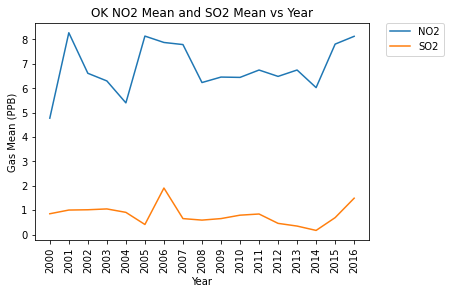

In [46]:
ok = pol_df_clean[(pol_df_clean['State'] == 'OK')]
no2mean = ok.groupby(by=['Date'])['NO2 Mean'].mean().values
NO2x = ok.groupby(by=['Date'])['NO2 Mean'].mean().index
NO2y = no2mean
so2mean = ok.groupby(by=['Date'])['SO2 Mean'].mean().values
SO2x = ok.groupby(by=['Date'])['SO2 Mean'].mean().index
SO2y = so2mean
plt.plot(NO2x, NO2y, label="NO2")
plt.plot(SO2x, SO2y, label="SO2")
plt.xticks(rotation='vertical')
plt.title("OK NO2 Mean and SO2 Mean vs Year")
plt.xlabel("Year")
plt.ylabel("Gas Mean (PPB)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

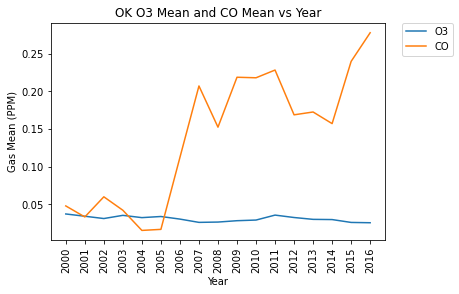

In [47]:
O3mean = ok.groupby(by=['Date'])['O3 Mean'].mean().values
O3x = ok.groupby(by=['Date'])['O3 Mean'].mean().index
O3y = O3mean
COmean = ok.groupby(by=['Date'])['CO Mean'].mean().values
COx = ok.groupby(by=['Date'])['CO Mean'].mean().index
COy = COmean
plt.plot(O3x, O3y, label="O3")
plt.plot(COx, COy, label="CO")
plt.xticks(rotation='vertical')
plt.title("OK O3 Mean and CO Mean vs Year")
plt.xlabel("Year")
plt.ylabel("Gas Mean (PPM)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

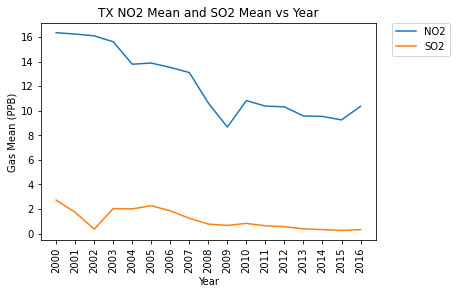

In [48]:
tx = pol_df_clean[(pol_df_clean['State'] == 'TX')]
no2mean = tx.groupby(by=['Date'])['NO2 Mean'].mean().values
NO2x = tx.groupby(by=['Date'])['NO2 Mean'].mean().index
NO2y = no2mean
so2mean = tx.groupby(by=['Date'])['SO2 Mean'].mean().values
SO2x = tx.groupby(by=['Date'])['SO2 Mean'].mean().index
SO2y = so2mean
plt.plot(NO2x, NO2y, label="NO2")
plt.plot(SO2x, SO2y, label="SO2")
plt.xticks(rotation='vertical')
plt.title("TX NO2 Mean and SO2 Mean vs Year")
plt.xlabel("Year")
plt.ylabel("Gas Mean (PPB)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

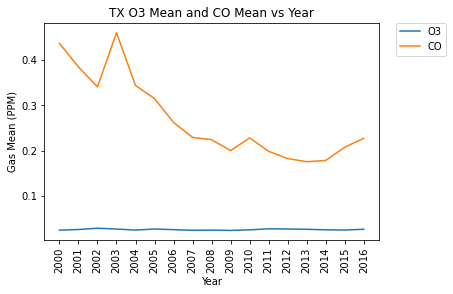

In [49]:
O3mean = tx.groupby(by=['Date'])['O3 Mean'].mean().values
O3x = tx.groupby(by=['Date'])['O3 Mean'].mean().index
O3y = O3mean
COmean = tx.groupby(by=['Date'])['CO Mean'].mean().values
COx = tx.groupby(by=['Date'])['CO Mean'].mean().index
COy = COmean
plt.plot(O3x, O3y, label="O3")
plt.plot(COx, COy, label="CO")
plt.xticks(rotation='vertical')
plt.title("TX O3 Mean and CO Mean vs Year")
plt.xlabel("Year")
plt.ylabel("Gas Mean (PPM)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



In [50]:
ca_fires = ca_disaster["Natural Disaster"].str.count('Fire').sum()
ca_hurricane = ca_disaster["Natural Disaster"].str.count('Hurricane').sum()
ca_storm = ca_disaster["Natural Disaster"].str.count('Severe Storm(s)').sum()
ca_flood = ca_disaster["Natural Disaster"].str.count('Flood').sum()
ca_ice = ca_disaster["Natural Disaster"].str.count('Severe Ice Storm').sum()

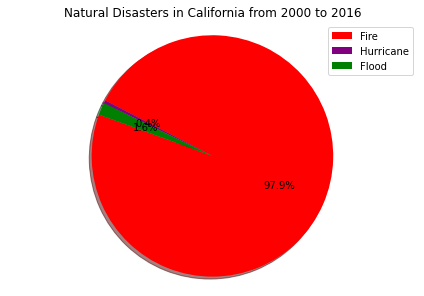

In [110]:
#Cali vs Natural Disasters Pie Chart
labels = ["Fire", "Hurricane", "Flood"]
sizes = (ca_fires, ca_hurricane, ca_flood)
colors = ["red", "purple", "green"]

plt.pie(sizes, colors=colors, shadow = True, startangle=160, autopct="%1.1f%%")
plt.legend(labels, loc="best")
plt.axis("equal")
plt.tight_layout()
plt.title("Natural Disasters in California from 2000 to 2016")


plt.savefig("Images/CA_Disasters.png")

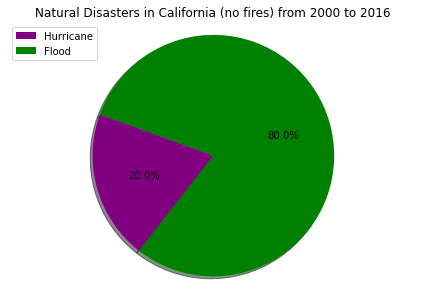

In [109]:
#Cali vs Natural Disasters without fire Pie Chart
labels = ["Hurricane", "Flood"]
sizes = (ca_hurricane, ca_flood)
colors = ["purple", "green"]

plt.pie(sizes, colors=colors, shadow = True, startangle=160, autopct="%1.1f%%")
plt.legend(labels, loc="best")
plt.axis("equal")
plt.tight_layout()
plt.title("Natural Disasters in California (no fires) from 2000 to 2016")
plt.savefig("Images/CA_Disasters_No_Fire.png")

In [53]:
co_fires = co_disaster["Natural Disaster"].str.count('Fire').sum()
co_hurricane = co_disaster["Natural Disaster"].str.count('Hurricane').sum()
co_storm = co_disaster["Natural Disaster"].str.count('Severe Storm(s)').sum()
co_flood = co_disaster["Natural Disaster"].str.count('Flood').sum()
co_ice = co_disaster["Natural Disaster"].str.count('Severe Ice Storm').sum()

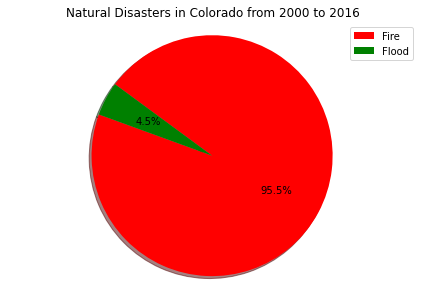

In [112]:
#Colorado vs Natural Disasters Pie Chart
labels = ["Fire", "Flood"]
sizes = (co_fires, co_flood)
colors = ["red", "green"]

plt.pie(sizes, colors=colors, shadow = True, startangle=160, autopct="%1.1f%%")
plt.legend(labels, loc="best")
plt.axis("equal")
plt.tight_layout()
plt.title("Natural Disasters in Colorado from 2000 to 2016")
plt.savefig("Images/CO_Disasters.png")

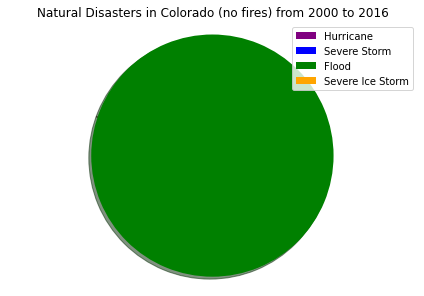

In [55]:
#Colorado vs Natural Disasters without fires Pie Chart
labels = ["Hurricane", "Severe Storm", "Flood", "Severe Ice Storm"]
sizes = (co_hurricane, co_storm, co_flood, co_ice)
colors = ["purple", "blue", "green", "orange"]

plt.pie(sizes, colors=colors, shadow = True, startangle=160)
plt.legend(labels, loc="best")
plt.axis("equal")
plt.tight_layout()
plt.title("Natural Disasters in Colorado (no fires) from 2000 to 2016")
plt.savefig("Images/CO_Disasters_No_Fire.png")

In [56]:
fl_fires = fl_disaster["Natural Disaster"].str.count('Fire').sum()
fl_hurricane = fl_disaster["Natural Disaster"].str.count('Hurricane').sum()
fl_storm = fl_disaster["Natural Disaster"].str.count('Severe Storm(s)').sum()
fl_flood = fl_disaster["Natural Disaster"].str.count('Flood').sum()
fl_ice = fl_disaster["Natural Disaster"].str.count('Severe Ice Storm').sum()

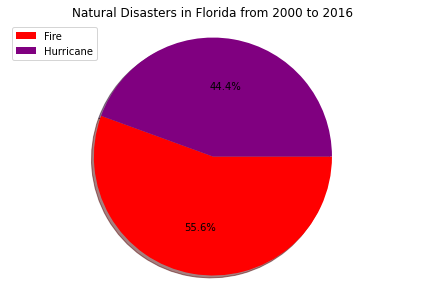

In [107]:
#Florida vs Natural Disasters Pie Chart
labels = ["Fire", "Hurricane"]
sizes = (fl_fires, fl_hurricane)
colors = ["red", "purple"]

plt.pie(sizes, colors=colors, shadow = True, startangle=160, autopct="%1.1f%%")
plt.legend(labels, loc="best")
plt.axis("equal")
plt.tight_layout()
plt.title("Natural Disasters in Florida from 2000 to 2016")
plt.savefig("Images/FL_Disasters.png")

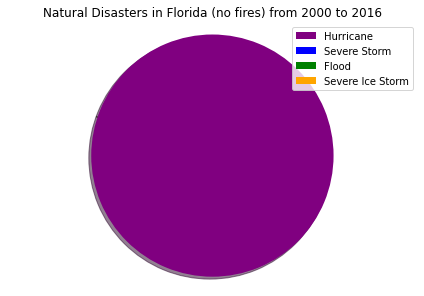

In [58]:
#Florida vs Natural Disasters without fire  Pie Chart
labels = ["Hurricane", "Severe Storm", "Flood", "Severe Ice Storm"]
sizes = (fl_hurricane, fl_storm, fl_flood, fl_ice)
colors = ["purple", "blue", "green", "orange"]

plt.pie(sizes, colors=colors, shadow = True, startangle=160)
plt.legend(labels, loc="best")
plt.axis("equal")
plt.tight_layout()
plt.title("Natural Disasters in Florida (no fires) from 2000 to 2016")
plt.savefig("Images/FL_Disasters_No_Fire.png")

In [59]:
ok_fires = ok_disaster["Natural Disaster"].str.count('Fire').sum()
ok_hurricane = ok_disaster["Natural Disaster"].str.count('Hurricane').sum()
ok_storm = ok_disaster["Natural Disaster"].str.count('Severe Storm(s)').sum()
ok_flood = ok_disaster["Natural Disaster"].str.count('Flood').sum()
ok_ice = ok_disaster["Natural Disaster"].str.count('Severe Ice Storm').sum()

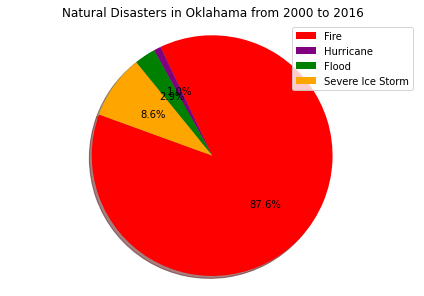

In [106]:
#Oklahama vs Natural Disasters Pie Chart
labels = ["Fire", "Hurricane", "Flood", "Severe Ice Storm"]
sizes = (ok_fires, ok_hurricane, ok_flood, ok_ice)
colors = ["red", "purple", "green", "orange"]

plt.pie(sizes, colors=colors, shadow = True, startangle=160, autopct="%1.1f%%")
plt.legend(labels, loc="best")
plt.axis("equal")
plt.tight_layout()
plt.title("Natural Disasters in Oklahama from 2000 to 2016")
plt.savefig("Images/OK_Disasters.png")

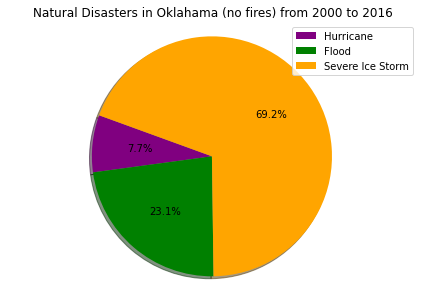

In [105]:
#Oklahama vs Natural Disasters without fire Pie Chart
labels = ["Hurricane", "Flood", "Severe Ice Storm"]
sizes = (ok_hurricane, ok_flood, ok_ice)
colors = ["purple", "green", "orange"]

plt.pie(sizes, colors=colors, shadow = True, startangle=160, autopct="%1.1f%%")
plt.legend(labels, loc="best")
plt.axis("equal")
plt.tight_layout()
plt.title("Natural Disasters in Oklahama (no fires) from 2000 to 2016")
plt.savefig("Images/OK_Disasters_No_Fire.png")

In [62]:
tx_fires = tx_disaster["Natural Disaster"].str.count('Fire').sum()
tx_hurricane = tx_disaster["Natural Disaster"].str.count('Hurricane').sum()
tx_storm = tx_disaster["Natural Disaster"].str.count('Severe Storm(s)').sum()
tx_flood = tx_disaster["Natural Disaster"].str.count('Flood').sum()
tx_ice = tx_disaster["Natural Disaster"].str.count('Severe Ice Storm').sum()

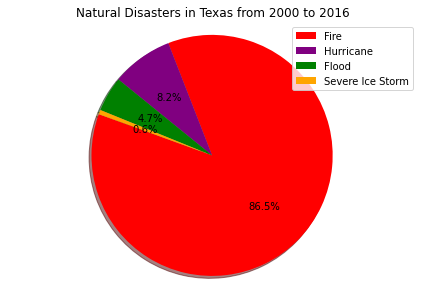

In [103]:
#Texas vs Natural Disasters Pie Chart
labels = ["Fire", "Hurricane", "Flood", "Severe Ice Storm"]
sizes = (tx_fires, tx_hurricane, tx_flood, tx_ice)
colors = ["red", "purple", "green", "orange"]

plt.pie(sizes, colors=colors, shadow = True, startangle=160, autopct="%1.1f%%")
plt.legend(labels, loc="best")
plt.axis("equal")
plt.tight_layout()
plt.title("Natural Disasters in Texas from 2000 to 2016")
plt.savefig("Images/TX_Disasters.png")

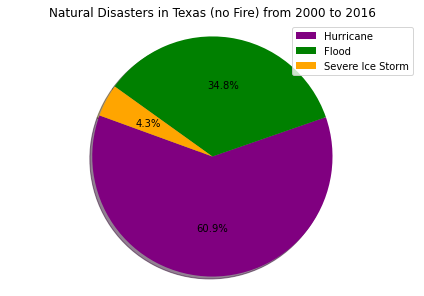

In [101]:
#Texas vs Natural Disasters without Fire Pie Chart
labels = ["Hurricane", "Flood", "Severe Ice Storm"]
sizes = tx_hurricane, tx_flood, tx_ice
colors = ["purple", "green", "orange"]

plt.pie(sizes, colors=colors, shadow = True, startangle=160, autopct="%1.1f%%")
plt.legend(labels, loc="best")
plt.axis("equal")
plt.tight_layout()
plt.title("Natural Disasters in Texas (no Fire) from 2000 to 2016")
plt.savefig("Images/TX_Disasters_No_Fire.png")

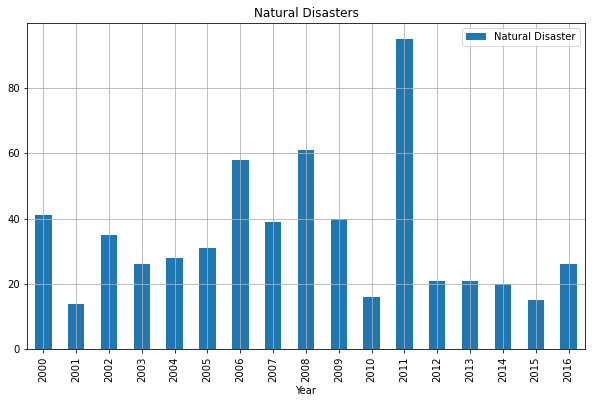

In [77]:
natural_disasters_df = disaster_clean.groupby('Year').count()[['Natural Disaster']]
natural_disasters_df = natural_disasters_df[natural_disasters_df.index < "2017"]
natural_disasters_df.head()



natural_disasters_df.plot.bar(title='Total Natural Disasters',grid=True, figsize = (10,6))

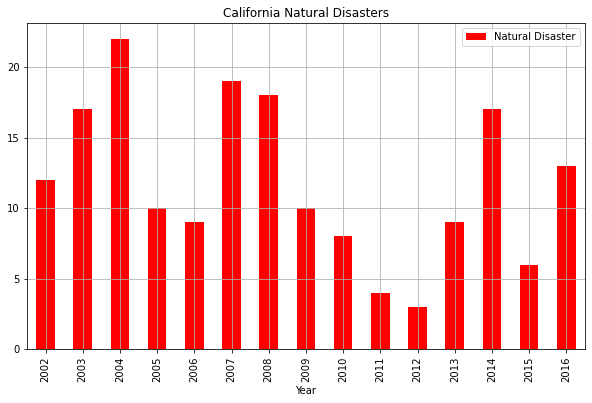

In [78]:
ca_d = ca_disaster.groupby('Year').count()[['Natural Disaster']]
ca_d = ca_d[ca_d.index < "2017"]
ca_d.plot.bar(title='California Natural Disasters',grid=True, figsize = (10,6,), color='red')

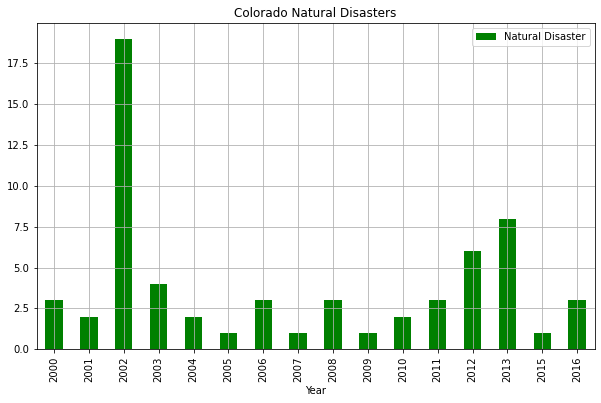

In [82]:
co_d = co_disaster.groupby('Year').count()[['Natural Disaster']]
co_d = co_d[co_d.index < "2017"]
co_d.plot.bar(title='Colorado Natural Disasters',grid=True, figsize = (10,6,), color='green')

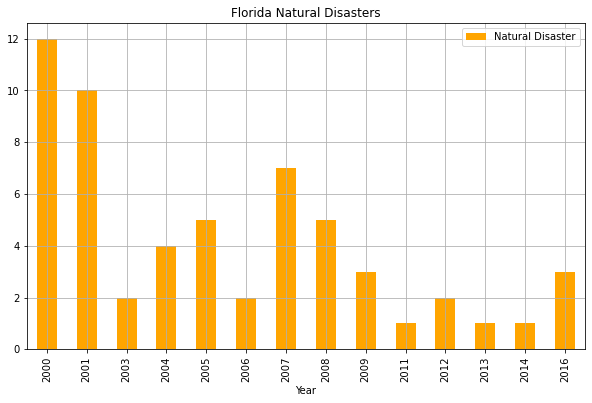

In [85]:
fl_d = fl_disaster.groupby('Year').count()[['Natural Disaster']]
fl_d = fl_d[fl_d.index < "2017"]
fl_d.plot.bar(title='Florida Natural Disasters',grid=True, figsize = (10,6,), color='orange')

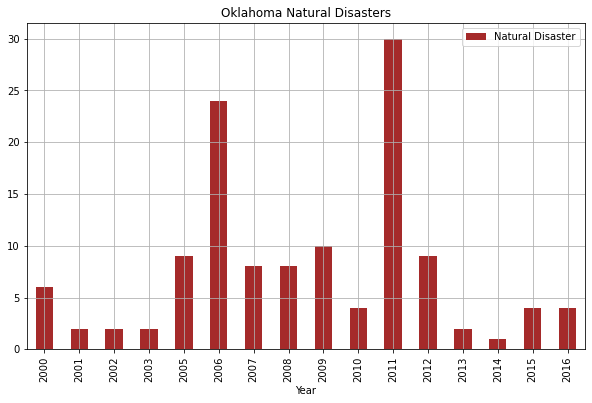

In [86]:
ok_d = ok_disaster.groupby('Year').count()[['Natural Disaster']]
ok_d = ok_d[ok_d.index < "2017"]
ok_d.plot.bar(title='Oklahoma Natural Disasters',grid=True, figsize = (10,6,), color='brown')

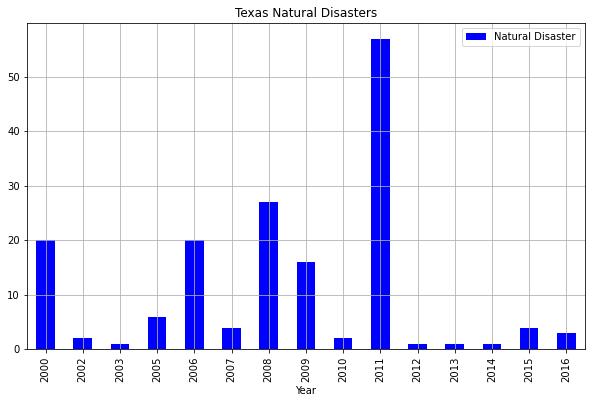

In [87]:
tx_d = tx_disaster.groupby('Year').count()[['Natural Disaster']]
tx_d = tx_d[tx_d.index < "2017"]
tx_d.plot.bar(title='Texas Natural Disasters',grid=True, figsize = (10,6,), color='blue')

The r-value is : 0.13828939591288775


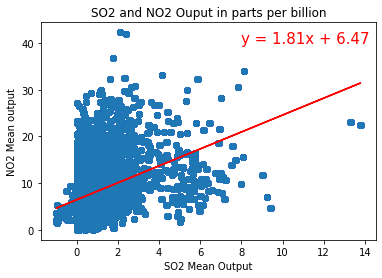

In [88]:
# Scatter plot of Florida SO2 Mean output vs NO2 Mean output
flso2 = fl["SO2 Mean"]
flno2 = fl["NO2 Mean"]
plt.scatter(fl["SO2 Mean"], fl["NO2 Mean"], facecolor="blue")
plt.title("SO2 and NO2 Ouput in parts per billion")
plt.xlabel("SO2 Mean Output")
plt.ylabel("NO2 Mean output")
(slope, intercept, rvalue, pvalue, stderr) = linregress(flso2, flno2)
print(f"The r-value is : {rvalue**2}")
regress_values = flso2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,40),fontsize=15,color="red")
plt.scatter(flso2, flno2)
plt.plot(flso2 ,regress_values,"r-")

plt.savefig("Images/SO2_NO2_Scatter.png")

The r-value is : 0.01520509981078374


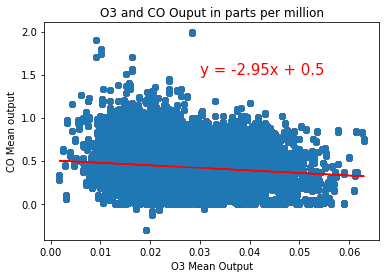

In [67]:
# Scatter plot of Florida SO2 Mean output vs NO2 Mean output
flo3 = fl["O3 Mean"]
flco = fl["CO Mean"]
plt.scatter(fl["O3 Mean"], fl["CO Mean"], facecolor="red")
plt.title("O3 and CO Ouput in parts per million")
plt.xlabel("O3 Mean Output")
plt.ylabel("CO Mean output")
(slope, intercept, rvalue, pvalue, stderr) = linregress(flo3, flco)
print(f"The r-value is : {rvalue**2}")
regress_values = flo3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0.03,1.5),fontsize=15,color="red")
plt.scatter(flo3, flco)
plt.plot(flo3 ,regress_values,"r-")

plt.show()

In [68]:
# (slope, intercept, rvalue, pvalue, stderr) = linregress(flo3, flco)
# regress_values = flo3 * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq,(0.03,1.5),fontsize=15,color="red")
# plt.scatter(flo3, flco)
# plt.plot(flo3 ,regress_values,"r-")

In [69]:
bar = pol_df_clean[(pol_df_clean['Date']) == "2000"]
bar

,State,Date,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
0,CA,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.636364,Parts per million,0.556522
1,CA,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.636364,Parts per million,0.572222
2,CA,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.600000,Parts per million,0.556522
3,CA,2000,Parts per billion,14.782609,Parts per million,0.015542,Parts per billion,0.600000,Parts per million,0.572222
4,CA,2000,Parts per billion,16.043478,Parts per million,0.015292,Parts per billion,1.000000,Parts per million,0.578261
...,...,...,...,...,...,...,...,...,...,...
42769,TX,2000,Parts per billion,15.166667,Parts per million,0.013792,Parts per billion,2.587500,Parts per million,0.441667
42770,TX,2000,Parts per billion,21.619048,Parts per million,0.010105,Parts per billion,8.136364,Parts per million,0.422727
42771,TX,2000,Parts per billion,21.619048,Parts per million,0.010105,Parts per billion,8.136364,Parts per million,0.575000
42772,TX,2000,Parts per billion,21.619048,Parts per million,0.010105,Parts per billion,7.966667,Parts per million,0.422727
